C = 0.5
R = 40


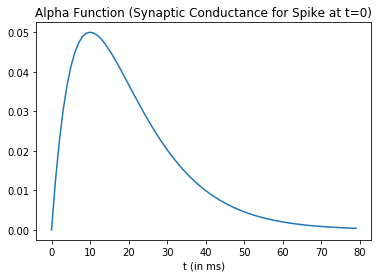

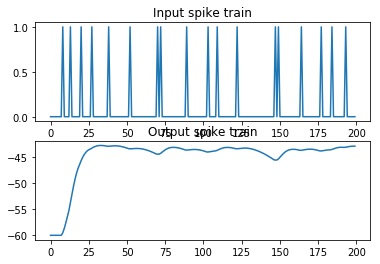

In [12]:
"""
Created on Wed Apr 22 16:13:18 2015

Fire a neuron via alpha function synapse and random input spike train
R Rao 2007

translated to python by rkp 2015
"""
from __future__ import print_function, division

import time
import numpy as np
from numpy import concatenate as cc
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# I & F implementation dV/dt = - V/RC + I/C
h = 1. # step size, Euler method, = dt ms
t_max= 200 # ms, simulation time period
tstop = int(t_max/h) # number of time steps
ref = 0 # refractory period counter

# Generate random input spikes
# Note: This is not entirely realistic - no refractory period
# Also: if you change step size h, input spike train changes too...
thr = 0.9 # threshold for random spikes
spike_train = np.random.rand(tstop) > thr

# alpha func synaptic conductance
t_a = 100 # Max duration of syn conductance
t_peak = 10 # ms
g_peak = 0.05 # nS (peak synaptic conductance)
const = g_peak / (t_peak*np.exp(-1));
t_vec = np.arange(0, t_a + h, h)
alpha_func = const * t_vec * (np.exp(-t_vec/t_peak))

plt.plot(t_vec[:80], alpha_func[:80])
plt.xlabel('t (in ms)')
plt.title('Alpha Function (Synaptic Conductance for Spike at t=0)')
plt.draw()
time.sleep(2) 

# capacitance and leak resistance
C = 0.5 # nF
R = 40 # M ohms
print('C = {}'.format(C))
print('R = {}'.format(R))

# conductance and associated parameters to simulate spike rate adaptation
g_ad = 0
G_inc = 1/h
tau_ad = 2

# Initialize basic parameters
E_leak = -60 # mV, equilibrium potential
E_syn = -40 # Excitatory synapse (why is this excitatory?)
g_syn = 0 # Current syn conductance
V_th = -40 # spike threshold mV
V_spike = 50 # spike value mV
ref_max = 4/h # Starting value of ref period counter
t_list = np.array([], dtype=int)
V = E_leak
V_trace = [V]
t_trace = [0]

fig, axs = plt.subplots(2, 1)
axs[0].plot(np.arange(0,t_max,h), spike_train)
axs[0].set_title('Input spike train')

for t in range(tstop):

    # Compute input
    if spike_train[t]: # check for input spike
        t_list = cc([t_list, [1]])

    # Calculate synaptic current due to current and past input spikes
    g_syn = np.sum(alpha_func[t_list])
    I_syn = g_syn*(E_syn - V) 

    # Update spike times
    if np.any(t_list):
        t_list = t_list + 1
        if t_list[0] == t_a: # Reached max duration of syn conductance
            t_list = t_list[1:]

    # Compute membrane voltage
    # Euler method: V(t+h) = V(t) + h*dV/dt
    if not ref:
        V = V + h*(-((V-E_leak)*(1+R*g_ad)/(R*C)) + (I_syn/C))
        g_ad = g_ad + h*(-g_ad/tau_ad) # spike rate adaptation
    else:
        ref -= 1
        V = V_th - 10 # reset voltage after spike
        g_ad = 0

    # Generate spike
    if (V > V_th) and not ref:
        V = V_spike
        ref = ref_max
        g_ad = g_ad + G_inc

    V_trace += [V]
    t_trace += [t*h]


axs[1].plot(t_trace,V_trace)
plt.draw()
axs[1].set_title('Output spike train')
plt.show()

In [14]:
W = np.diag?

In [24]:
W = np.diag(0.5*np.ones(5)) + 0.1*np.ones((5,5))
u = np.array([0.6,0.5,0.6,0.2,0.1]).T
M = np.diag(-0.25*np.ones(5)) + np.diag(0.25*np.ones(3), k=2) + np.diag(0.25*np.ones(3), k=-2) + np.diag(0.25*np.ones(2), k=3) + np.diag(0.25*np.ones(2), k=-3)

In [89]:
steady_state_v = -np.linalg.inv(M - np.identity(5)) @ W @ u
steady_state_v

array([0.61609195, 0.54022989, 0.6091954 , 0.47126437, 0.42988506])

In [75]:
w,v = np.linalg.eig(M)
print(M)
print(np.array_str(v @ np.diag(w) @ np.linalg.inv(v), precision=2,suppress_small=True) )

[[-0.25  0.    0.25  0.25  0.  ]
 [ 0.   -0.25  0.    0.25  0.25]
 [ 0.25  0.   -0.25  0.    0.25]
 [ 0.25  0.25  0.   -0.25  0.  ]
 [ 0.    0.25  0.25  0.   -0.25]]
[[-0.25 -0.    0.25  0.25 -0.  ]
 [-0.   -0.25  0.    0.25  0.25]
 [ 0.25 -0.   -0.25 -0.    0.25]
 [ 0.25  0.25  0.   -0.25 -0.  ]
 [-0.    0.25  0.25  0.   -0.25]]


In [90]:
w # Note that a stable recurrent network!

array([-0.6545085, -0.0954915,  0.25     , -0.6545085, -0.0954915])

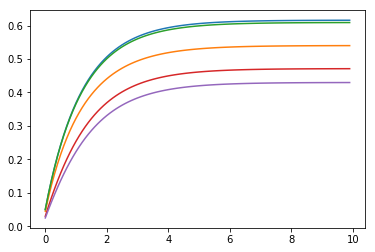

In [88]:
#vp = -v + W u + M v
t_total = 10
step = 0.1
t_steps = int(t_total/step)

v = np.zeros(u.shape) # Init to zero
v_all = np.zeros((t_steps,v.shape[0]))
for t in range(t_steps):
    vp = -v + W @ u + M @ v
    v = v + step* vp
    v_all[t] = v
    
plt.plot(step * np.arange(t_steps),v_all);    